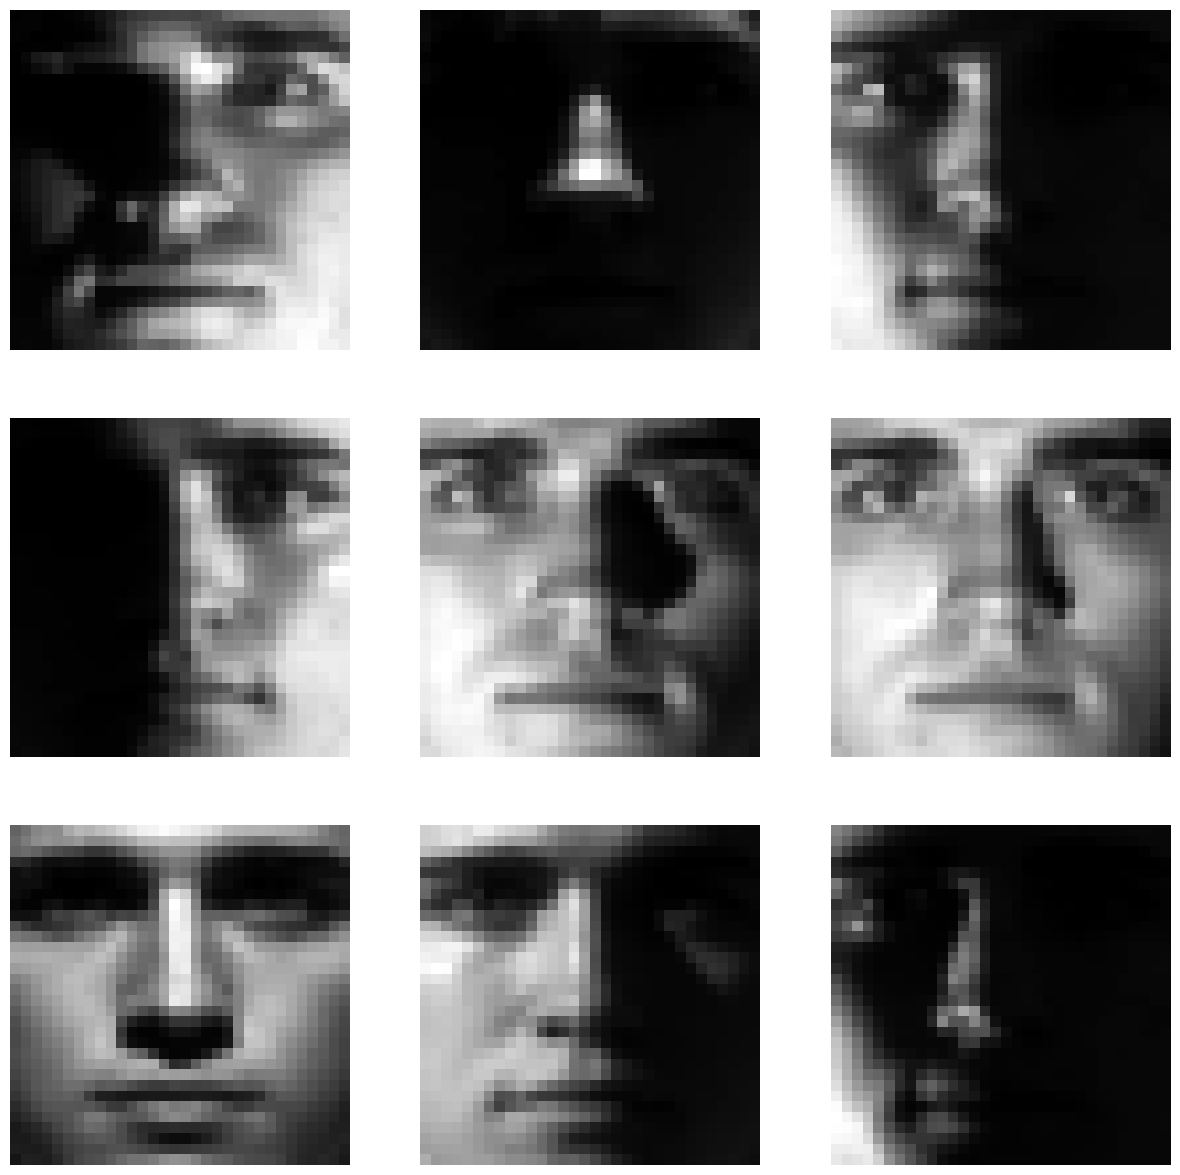

(1024, 2414)


In [21]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

results=loadmat('yalefaces.mat')
X=results['X']

fig = plt.figure(figsize=(15, 15))
for k in range(9):
    Xp = X[:, k].reshape((32, 32), order='F')
    uplot = Xp.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot, cmap='gray')
    ax.axis('off')

#plt.savefig('AE_yale1.eps', format='eps')
plt.show()
print(X.shape)

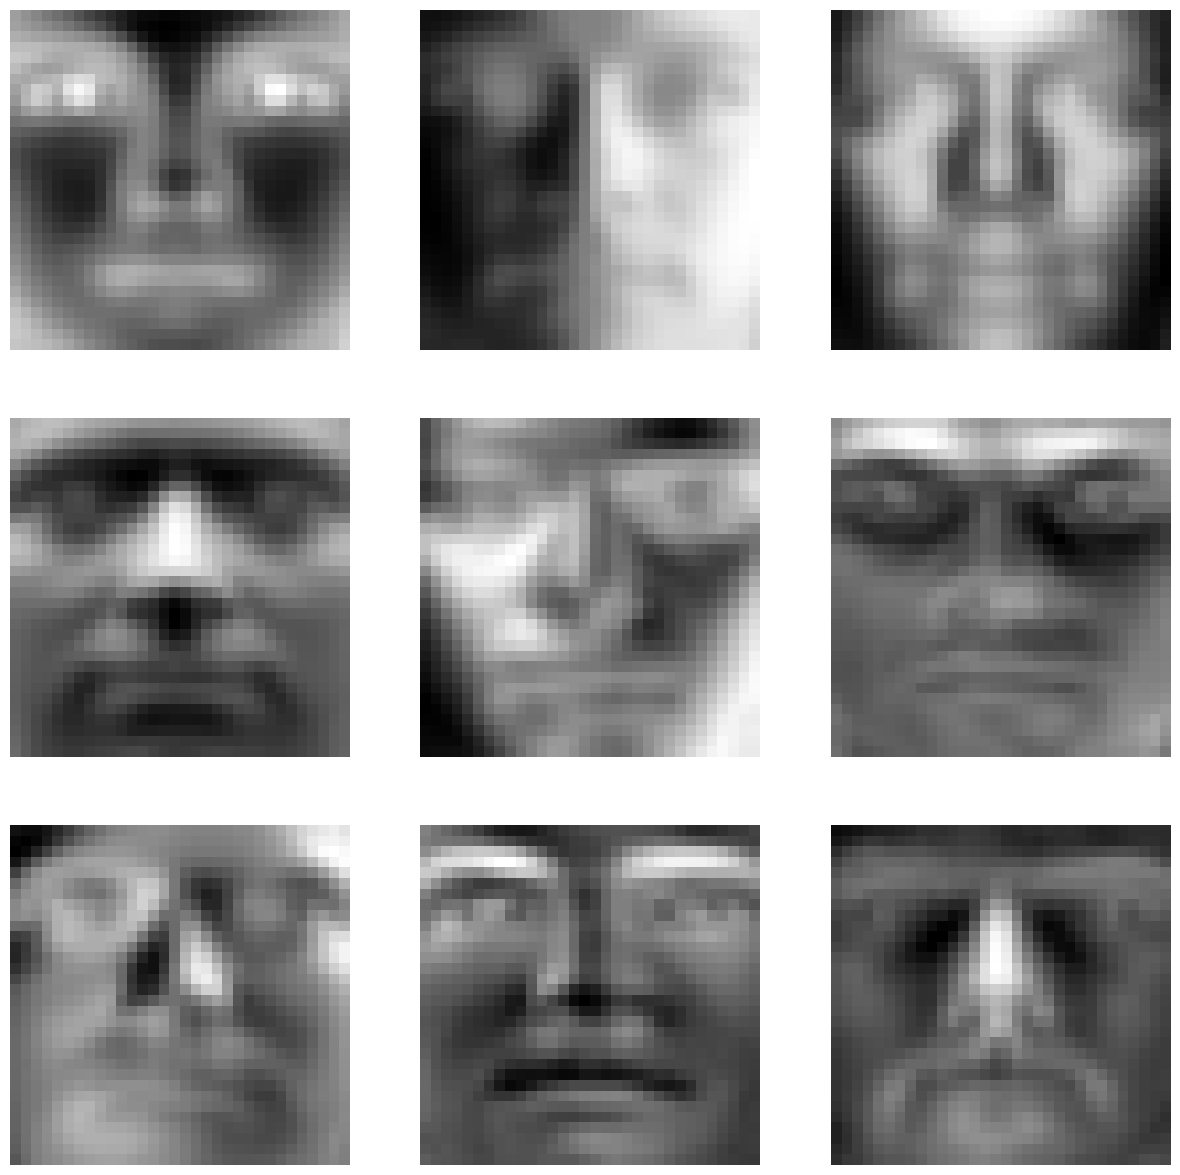

(1024,)
[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801]
(2414, 2414)
2911.732560805223


In [14]:
u,s,v=np.linalg.svd(X)
fig = plt.figure(figsize=(15, 15))
for k in range(9):
    Up = u[:, k].reshape((32, 32), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot, cmap='gray')
    ax.axis('off')


#plt.savefig('AE_yale2.eps', format='eps')
plt.show()

print(s.shape)
print(s[0:5])
print(v.shape)
print(np.sum(s))

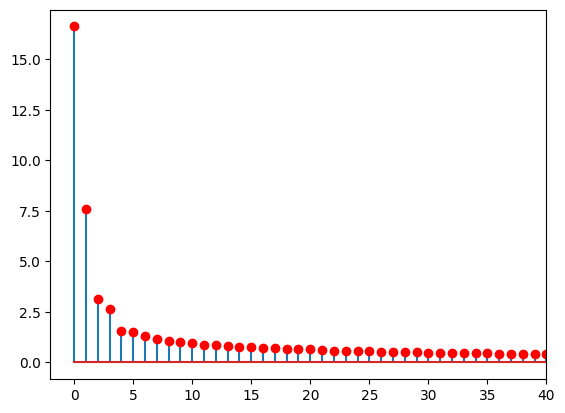

In [9]:
plt.stem(100*s/np.sum(s), markerfmt='ro')
plt.xlim(-2, 40)
plt.show()

In [13]:
print(v.shape)

(2414, 2414)


(-2.0, 100.0)

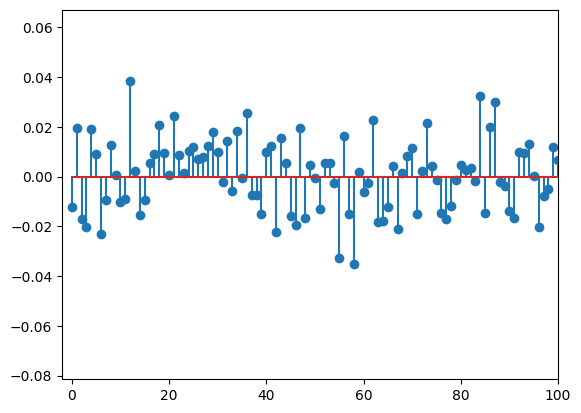

In [18]:
plt.stem(v[:,0])
plt.xlim(-2, 100)

(-2.0, 100.0)

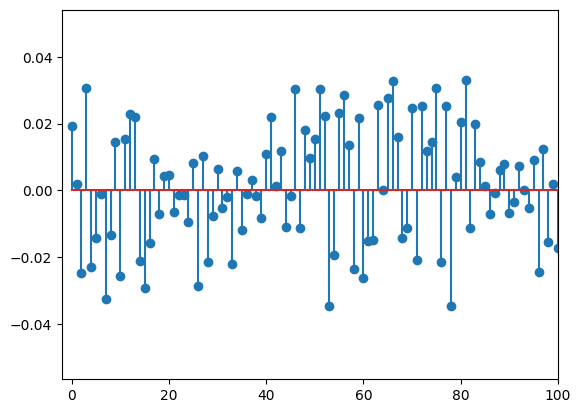

In [22]:
plt.stem(v[1,:])
plt.xlim(-2, 100)

In [23]:
# NOW ON TO NEURAL NETWORKS:  AUTOENCODERS & DECODERS

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np



In [24]:
[m,n] = X.shape
input_dim = m
r = 20


In [25]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
#            nn.ReLU()  # Using ReLU at the output can be replaced by another activation function or none depending on your data
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [26]:
X2 = (X.T).astype(np.float32)
tensor_X = torch.from_numpy(X2)

dataset = TensorDataset(tensor_X)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [27]:
# Model initialization
autoencoder = Autoencoder(m, r)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
loss_function = nn.MSELoss()

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = loss_function(outputs, inputs)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.01010047271847725
Epoch 11, Loss: 0.005408151540905237
Epoch 21, Loss: 0.002778490073978901
Epoch 31, Loss: 0.0031608669087290764
Epoch 41, Loss: 0.002356023993343115
Epoch 51, Loss: 0.002538739936426282
Epoch 61, Loss: 0.0027979486621916294
Epoch 71, Loss: 0.0030078385025262833
Epoch 81, Loss: 0.0012365265283733606
Epoch 91, Loss: 0.0017205325420945883
Epoch 101, Loss: 0.0017548007890582085
Epoch 111, Loss: 0.002041447442024946
Epoch 121, Loss: 0.0012107262155041099
Epoch 131, Loss: 0.0020112881902605295
Epoch 141, Loss: 0.0018649559933692217
Epoch 151, Loss: 0.0015179924666881561
Epoch 161, Loss: 0.0014571683714166284
Epoch 171, Loss: 0.001597783644683659
Epoch 181, Loss: 0.0020465929992496967
Epoch 191, Loss: 0.0017608909402042627
Epoch 201, Loss: 0.0023175403475761414
Epoch 211, Loss: 0.0013236051890999079
Epoch 221, Loss: 0.0013469808036461473
Epoch 231, Loss: 0.0016787165077403188
Epoch 241, Loss: 0.001962150214239955
Epoch 251, Loss: 0.0009492603130638599
Epoch 

(9, 1024)


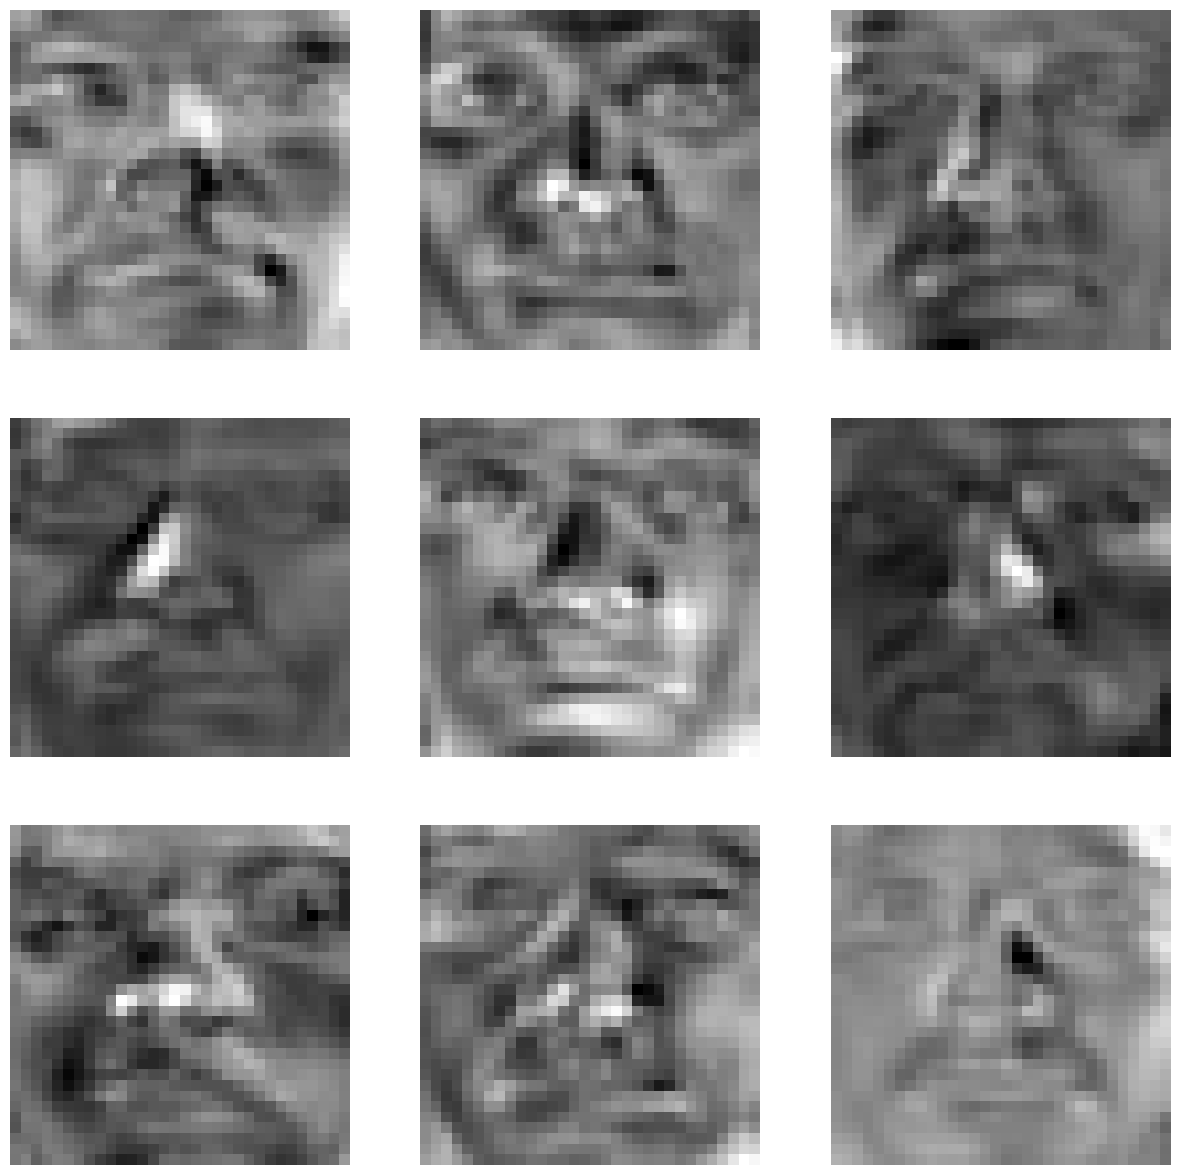

In [28]:
# Generate latent vectors
# Here we use identity matrix to create basis vectors for visualization if r <= 6
latent_vectors = torch.eye(r)
#if r > 9:
#    latent_vectors = latent_vectors[:9]  # Only take first 6 if r is larger than 6
latent_vectors2 = latent_vectors[:9] # pull 9 modes

# Decode latent vectors
decoded = autoencoder.decoder(latent_vectors2).detach().numpy()
print(decoded.shape)

# Plot decoded vectors
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    if i < r:
        ax.imshow(decoded[i].reshape(32, 32), cmap='gray')
        #ax.set_title(f"Decoded Feature {i+1}")
        ax.axis('off')

#plt.savefig('AE_yale3.eps', format='eps')
plt.show()
